In [2]:
import pandas as pd     

In [3]:
df = pd.read_csv('datasets/hotel_bookings.csv')
display(df) # Display the data


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
# printing out the number of rows and columns
print("The dataset contains", df.shape[0],"rows and", df.shape[1],"columns")

The dataset contains 119390 rows and 32 columns


In [5]:
df.sample(10) # Randomly sample 10 rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
52617,City Hotel,1,87,2016,June,24,8,2,5,2,...,No Deposit,89.0,NaN,0,Transient,93.55,0,0,Canceled,2016-03-18
81244,City Hotel,0,47,2015,December,49,5,2,1,2,...,No Deposit,1.0,NaN,0,Transient-Party,62.00,0,0,Check-Out,2015-12-08
10882,Resort Hotel,1,124,2017,April,15,9,2,5,2,...,Non Refund,492.0,NaN,0,Transient,80.00,0,0,Canceled,2017-02-28
36579,Resort Hotel,0,283,2017,May,20,15,3,7,2,...,No Deposit,243.0,NaN,0,Contract,40.95,0,1,Check-Out,2017-05-25
29519,Resort Hotel,0,17,2016,October,44,28,0,2,2,...,No Deposit,NaN,NaN,0,Transient,44.00,1,0,Check-Out,2016-10-30
42006,City Hotel,0,145,2015,August,35,29,2,1,2,...,No Deposit,17.0,NaN,0,Transient-Party,94.50,0,0,Check-Out,2015-09-01
98937,City Hotel,0,51,2016,October,41,5,0,2,2,...,No Deposit,9.0,NaN,0,Transient,108.00,0,1,Check-Out,2016-10-07
97616,City Hotel,0,128,2016,September,38,16,0,2,2,...,No Deposit,89.0,NaN,0,Transient,100.29,0,3,Check-Out,2016-09-18
69059,City Hotel,1,181,2017,May,21,25,0,2,2,...,Non Refund,NaN,NaN,0,Transient,130.00,0,0,Canceled,2016-11-25
36529,Resort Hotel,0,303,2017,May,19,11,4,8,2,...,No Deposit,243.0,NaN,0,Contract,70.95,0,0,Check-Out,2017-05-23


In [6]:
df.head() # Display the first 5 rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
df.info() # Display the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

If the data columns are high in number, use `display.max_columns` to show all columns

In [10]:
pd.set_option('display.max_columns', None) # Display all columns

In [11]:
df.describe() 
# Get the summary statistics of the data frame. 
# Includes only the numerical columns.

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [12]:
# Find missing values attempt
df.isnull().count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119390
babies                            119390
meal                              119390
country                           119390
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             119390
company         

Why above returns all rows and not the count of `isnull`?

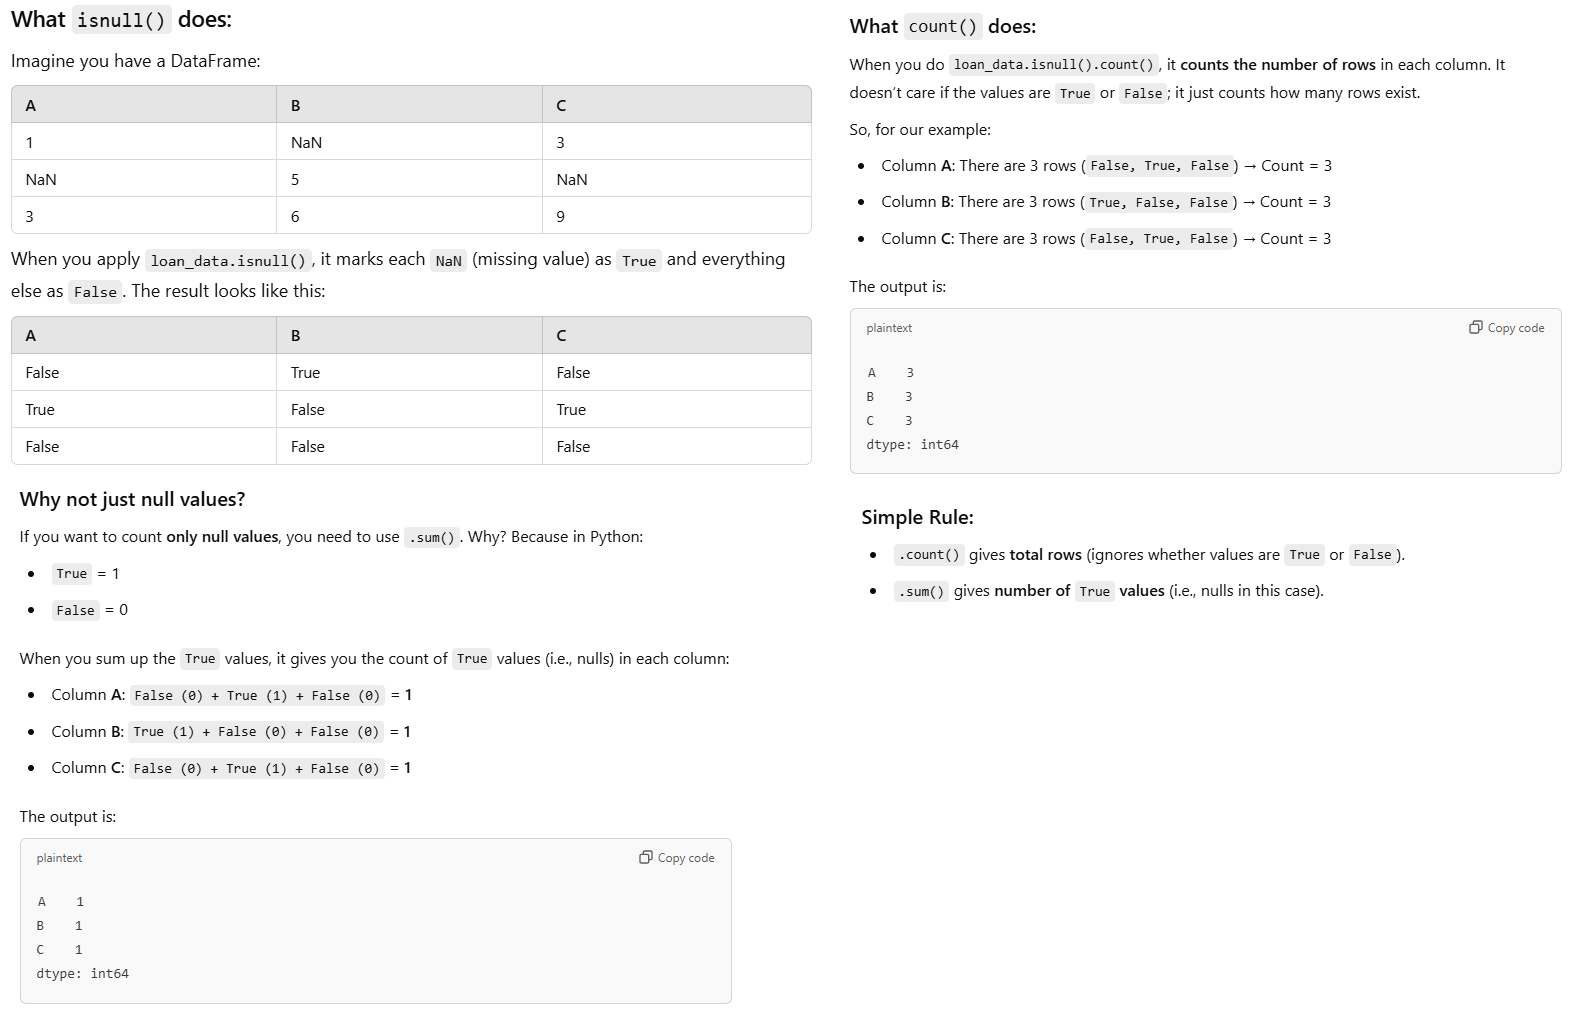

In [31]:
display(Image('images/missing_values_count.png')) # Display the image

In [13]:
# Find missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [14]:
# Show percentage of missing values in each column
(df.isnull().sum() / len(df)) * 100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

If two features (variables) are positively correlated, they tend to increase or decrease together. If they are negatively correlated, one tends to increase while the other decreases. And if there’s no correlation, one feature’s change doesn’t consistently relate to the other’s.

Intuitive Examples of Correlation
1. Ice Cream Sales vs. Temperature<br>
    - As the temperature goes up, ice cream sales often go up, too (positive correlation).
    - In cold weather, fewer people buy ice cream, and vice versa.
2. Age of a Car vs. Resale Value
   - As cars get older, their resale value decreases (negative correlation).
   - Newer cars tend to have higher resale values.

Highly correlated features often carry redundant or overlapping information. For instance, if you have two features that both measure the same underlying concept (e.g., a house’s living area in square feet and total area including the garage), one may be enough to capture that concept.

High correlation among input features can cause instability in coefficient estimates, making the model sensitive to small changes in the data. This is sometimes referred to as **multicollinearity**.


Many practitioners use a correlation threshold (absolute value) in the range of 0.8 to 0.95 as a guideline for deciding when two features are “too highly correlated.” A commonly cited “rule of thumb” threshold is around 0.9 (i.e., ∣𝑟∣≥0.9)

However, A high correlation does not necessarily mean the two columns contain exactly the same information:

However, a high correlation by itself does not mean a feature is useless or redundant—it simply means there’s some linear relationship between them. Consider other factors like scatter-plot, business need, small v/s large dataset etc. before dropping one of them.

In [17]:
df.select_dtypes(include='number').corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


In [18]:
df.select_dtypes(include='number').skew() 
# Get the skewness of the data frame
# Skewness measures the asymmetry of the distribution of data around its mean.
# It throws error if DataFrame contains non-numeric columns as well. Use only numeric columns.

is_canceled                        0.536678
lead_time                          1.346550
arrival_date_year                 -0.232583
arrival_date_week_number          -0.010014
arrival_date_day_of_month         -0.002000
stays_in_weekend_nights            1.380046
stays_in_week_nights               2.862249
adults                            18.317805
children                           4.112590
babies                            24.646545
is_repeated_guest                  5.326315
previous_cancellations            24.458049
previous_bookings_not_canceled    23.539800
booking_changes                    6.000270
agent                              1.089386
company                            0.601600
days_in_waiting_list              11.944353
adr                               10.530214
required_car_parking_spaces        4.163233
total_of_special_requests          1.349189
dtype: float64

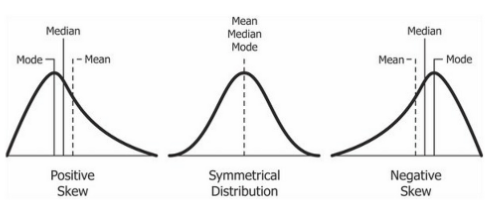

In [8]:
from IPython.display import Image, display

display(Image('images/skewness.png'))

![](/images/skewness.png)

In [19]:
Q1 = df.select_dtypes(include='number').quantile(0.25, axis = 0) # 25% of the data

print('First_Quartile :\n', Q1)

First_Quartile :
 is_canceled                          0.00
lead_time                           18.00
arrival_date_year                 2016.00
arrival_date_week_number            16.00
arrival_date_day_of_month            8.00
stays_in_weekend_nights              0.00
stays_in_week_nights                 1.00
adults                               2.00
children                             0.00
babies                               0.00
is_repeated_guest                    0.00
previous_cancellations               0.00
previous_bookings_not_canceled       0.00
booking_changes                      0.00
agent                                9.00
company                             62.00
days_in_waiting_list                 0.00
adr                                 69.29
required_car_parking_spaces          0.00
total_of_special_requests            0.00
Name: 0.25, dtype: float64


In [20]:
Q3 = df.select_dtypes(include='number').quantile(0.75, axis = 0) # 75% of the data

print('Third_Quartile :\n', Q3)

Third_Quartile :
 is_canceled                          1.0
lead_time                          160.0
arrival_date_year                 2017.0
arrival_date_week_number            38.0
arrival_date_day_of_month           23.0
stays_in_weekend_nights              2.0
stays_in_week_nights                 3.0
adults                               2.0
children                             0.0
babies                               0.0
is_repeated_guest                    0.0
previous_cancellations               0.0
previous_bookings_not_canceled       0.0
booking_changes                      0.0
agent                              229.0
company                            270.0
days_in_waiting_list                 0.0
adr                                126.0
required_car_parking_spaces          0.0
total_of_special_requests            1.0
Name: 0.75, dtype: float64


The 25th(Q1) and 75th(Q3) quartiles are obtained and Inter quartile range(IQR) is obtained from Q3 and Q1

In [21]:
IQR = Q3 - Q1

print('Inter Quartile Range :\n', IQR)

Inter Quartile Range :
 is_canceled                         1.00
lead_time                         142.00
arrival_date_year                   1.00
arrival_date_week_number           22.00
arrival_date_day_of_month          15.00
stays_in_weekend_nights             2.00
stays_in_week_nights                2.00
adults                              0.00
children                            0.00
babies                              0.00
is_repeated_guest                   0.00
previous_cancellations              0.00
previous_bookings_not_canceled      0.00
booking_changes                     0.00
agent                             220.00
company                           208.00
days_in_waiting_list                0.00
adr                                56.71
required_car_parking_spaces         0.00
total_of_special_requests           1.00
dtype: float64


Outliers are detected using IQR method i.e An outlier is a point which falls more than 1.5 times the interquartile range above the third quartile or below the first quartile.


In [22]:
# Only the outlier rows are displayed 
df_outliers = df[((df.select_dtypes(include='number') < (Q1 - 1.5 * IQR)) |\
                                    (df.select_dtypes(include='number') > (Q3 + 1.5 * IQR))).any(axis = 1)]

df_outliers

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
12,Resort Hotel,0,68,2015,July,27,1,0,4,2,0.0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,2015-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119376,City Hotel,0,165,2017,August,35,29,1,5,3,0.0,0,BB,AUT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,209.25,0,3,Check-Out,2017-09-04
119382,City Hotel,0,135,2017,August,35,30,2,4,3,0.0,0,BB,JPN,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07


In [23]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [24]:
# Unique rows in the DataFrame
df.value_counts()

hotel         is_canceled  lead_time  arrival_date_year  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  meal  country  market_segment  distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  reserved_room_type  assigned_room_type  booking_changes  deposit_type  agent  company  days_in_waiting_list  customer_type    adr     required_car_parking_spaces  total_of_special_requests  reservation_status  reservation_status_date
City Hotel    0            256        2016               October             43                        16                         2                        3                     2       0.0       0       BB    DEU      Online TA       TA/TO                 0                  0                       0                               A                   A                   0                No Deposit    9.0    333.0    0                

In [25]:
# Unique rows in the DataFrame. 
# It contains NaN values. 
# By default, it drops rows with NaN values even if it is present in one of the columns.
df.value_counts(dropna=False) 

hotel         is_canceled  lead_time  arrival_date_year  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  meal  country  market_segment  distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  reserved_room_type  assigned_room_type  booking_changes  deposit_type  agent  company  days_in_waiting_list  customer_type    adr     required_car_parking_spaces  total_of_special_requests  reservation_status  reservation_status_date
City Hotel    1            277        2016               November            46                        7                          1                        2                     2       0.0       0       BB    PRT      Groups          TA/TO                 0                  0                       0                               A                   A                   0                Non Refund    NaN    NaN      0                

In [26]:
# Count of unique values in the column
df['agent'].value_counts() 

agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
197.0        1
294.0        1
388.0        1
453.0        1
480.0        1
Name: count, Length: 333, dtype: int64

In [27]:
# Unique values in each columns in the DataFrame
# nquique() method returns the number of unique values in specified axis. Default, axis = 0 i.e .vertically

df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [28]:
# total number of duplicates in the dataset
df.duplicated().sum()

np.int64(31994)

In [29]:
# extract the dataframe containing the duplicate values
df.loc[df.duplicated(), :]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
